In [1]:
# Python program to read
# image using matplotlib
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import glob
import imutils
from skimage.metrics import structural_similarity as SIMM
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json

# Based solely on edge detection (canny)

In [2]:
def getImageFeature(img):
    gray = img[:,:,0]

    hist,bin_edgs=np.histogram(gray,bins=50) #getting the histogram of the image
    bin_c=0.5*(bin_edgs[:-1]+bin_edgs[1:]) #getting all the centres of the bins of the histogram
    bin_threshold=sum(bin_c)/len(bin_c) #setting the threshold as average of all the bin centres

    bin_threshold += 48

    # Denoise
    deNoise = cv2.bilateralFilter(gray,9,75,75) # blur but keeping edge
    deNoise = cv2.medianBlur(deNoise,5)
    deNoise = cv2.bilateralFilter(gray,9,75,75)

    # Get Bin Mask
    binary_img = deNoise > bin_threshold #forming the binary image
    binary_img.dtype='uint8' # convert binary_img in type of true false to decimal array
    binMask = binary_img

    binary_img.dtype='uint8' # convert binary_img in type of true false to decimal 0-1 array
    binary_img = np.array(binary_img*255,dtype=np.uint8) # convert binary_img in type of true false to decimal 0-255 array

    # Get Edge
    ## from bin
    # edged = cv2.Canny(binary_img, 30, 200)
    blurBin = cv2.GaussianBlur(binary_img,(3,3), 0, 0) 
    edged = cv2.Canny(blurBin, 100, 200)
    ## from gray
    edge_gray = cv2.Canny(gray, 200, 255)
    ## sharpen the grayscale even more and get edge via canny-gray
    sharpen_filter=np.array([[-1,-1,-1],
                    [-1,9,-1],
                    [-1,-1,-1]])
    ### applying kernels to the input image to get the sharpened image
    sharp_image=cv2.filter2D(deNoise,-1,sharpen_filter)
    edge_gray_sharp = cv2.Canny(sharp_image, 200, 255)

    # Find Contour
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    print("Number of Contours found = " + str(len(contours)))
    contourImg = cv2.bitwise_and(img, img, mask=binMask)
    # contourImg = img.copy()
    ## approximate contour


    # Draw all contours
    cv2.drawContours(contourImg, contours, -1,  (255, 0, 255), 3) # -1 signifies drawing all contours


    # draw the biggest contour (ContourMax) in cyan
    contourMax = max(contours, key = cv2.contourArea)

    ## Draw the detecting rectangle
    x,y,w,h = cv2.boundingRect(contourMax)
    cv2.rectangle(contourImg,(x,y),(x+w,y+h),(0,255,0),2)

    ## Find the biggest Contour and draw it
    cv2.drawContours(contourImg, contourMax, -1,  (9, 255, 255), 3) # -1 signifies drawing all contours

    # Get new bin Mask from Contour
    cv2.drawContours(
        image=binMask,
        contours=[contourMax],
        contourIdx=-1,
        color=(255,255,255),
        thickness=cv2.FILLED)
    # Get Image from AND with Mask
    binMask = np.array(binMask/255,dtype=np.uint8) # convert binary_img in type of true false to decimal 0-255 array
    masked_Image = cv2.bitwise_and(img,img, mask= binMask)

    # Get Image from AND with Mask

    masked_Image = cv2.bitwise_and(img,img, mask= binMask)

    # Display

    fig = plt.figure()

    ax0 = fig.add_subplot(2,3,1)
    ax0.imshow(edged,cmap = 'gray')
    ax0.title.set_text('Edge Bin')

    ax1 = fig.add_subplot(2,3,2)
    ax1.imshow(binary_img,cmap="gray")
    ax1.title.set_text('Binary Mask')

    ax2 = fig.add_subplot(2,3,3)
    ax2.imshow(contourImg)
    ax2.title.set_text('ContourImg')

    ax3 = fig.add_subplot(2,3,4)
    ax3.imshow(edge_gray,cmap="gray")
    ax3.title.set_text('Edge Gray')

    ax4 = fig.add_subplot(2,3,5)
    ax4.imshow(edge_gray_sharp,cmap='gray')
    ax4.title.set_text('Edge Gray-Sharpen')

    ax5 = fig.add_subplot(2,3,6)
    ax5.imshow(masked_Image)
    ax5.title.set_text('Binary Mask')

Number of Contours found = 21
Number of Contours found = 23


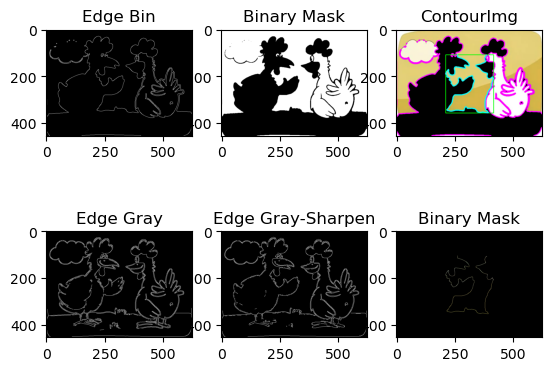

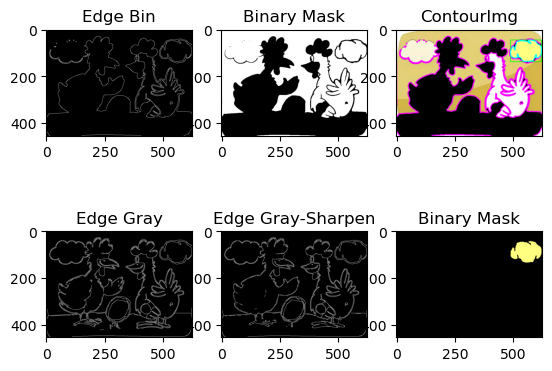

In [3]:
imgs_path = './resources/chick1.png'
image1 = cv2.imread(imgs_path)

imgs_path = './resources/chick3.png'
image2 = cv2.imread(imgs_path)

getImageFeature(image1)
getImageFeature(image2)

Number of Contours found = 214
Number of Contours found = 23
Number of Contours found = 1
Number of Contours found = 197
Number of Contours found = 199
Number of Contours found = 21
Number of Contours found = 27


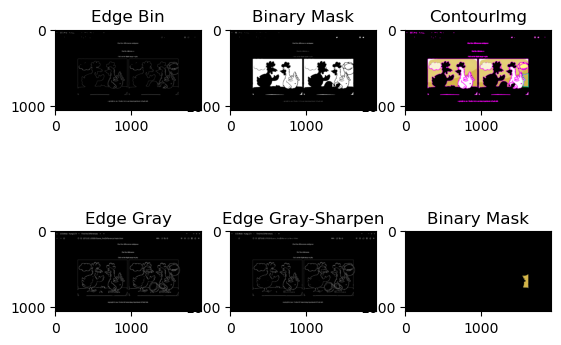

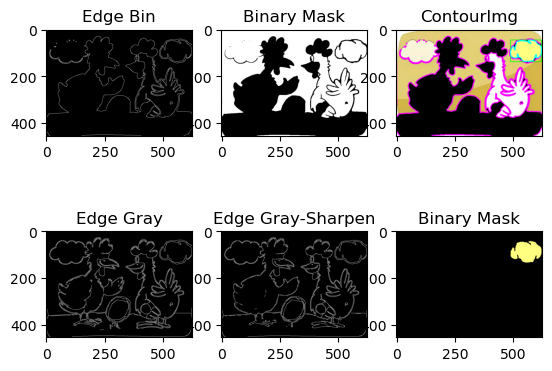

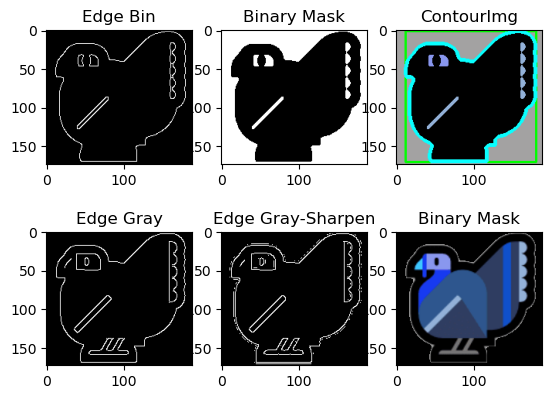

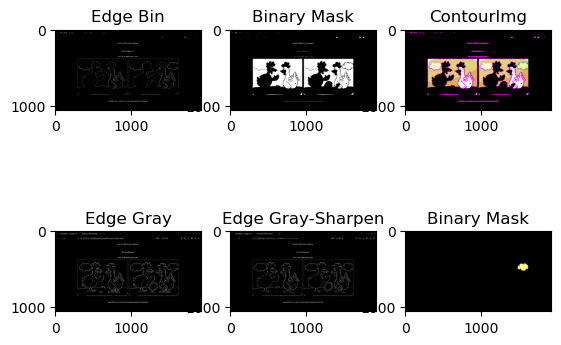

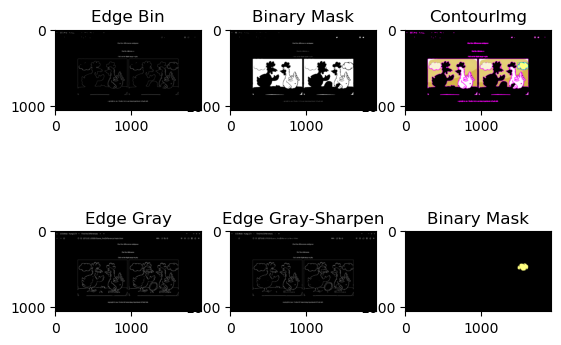

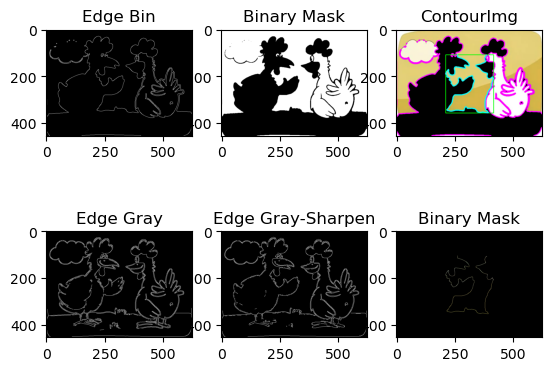

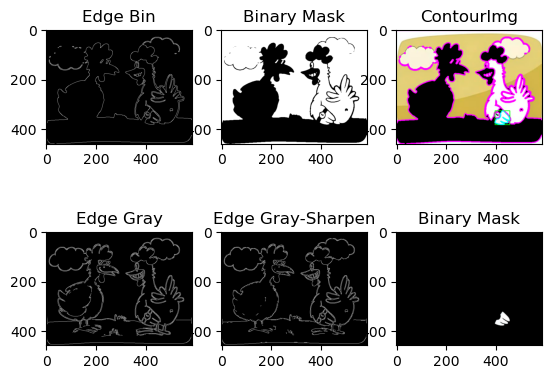

In [279]:
imgs_path = './resources/*.png'
images = glob.glob(imgs_path,recursive=True)
for i,fname in enumerate(images):
    img = cv2.imread(fname)
    getImageFeature(img)


# Creating Mask based on comparing threshold with the differences in pixel value between 2 images

Number of Contours found = 4
435 338
308 337
228 112
555 94


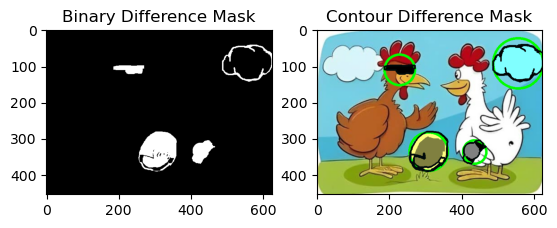

In [45]:
imgs_path = './resources/chick1.png'
image1 = cv2.imread(imgs_path)

imgs_path = './resources/chick3.png'
image2 = cv2.imread(imgs_path)


difference = cv2.subtract(image1, image2)
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)

# get Bit Mask

bin_threshold = 0

binMask = Conv_hsv_Gray > bin_threshold #forming the binary image

binary_img = binMask
binary_img.dtype='uint8' # convert binary_img in type of true false to decimal 0-1 array
binary_img = np.array(binary_img*255,dtype=np.uint8) # convert binary_img in type of true false to decimal 0-255 array
mask = binMask


difference = binMask

# Find Contour

contours, hierarchy = cv2.findContours(difference, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))
# contourImg = cv2.bitwise_and(img, img, mask=binMask)

contourImg = image2.copy()
contourImg = cv2.cvtColor(contourImg, cv2.COLOR_BGR2RGB)

## approximate contour


# Draw all contours
# find boundingBox and draw it
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 20:   # get rid of contours that too small (if exist)
        x,y,w,h = cv2.boundingRect(contour)
        # cv2.rectangle(contourImg,(x,y),(x+w,y+h),(0,255,0),5)
        cx = x+int(w/2)
        cy =y+ int(h/2)
        center_coordinates = (cx,cy)
        print(cx,cy)
        radius = int(w/2)
        cv2.circle(contourImg, center_coordinates, radius, (0,255,0), 5) 
cv2.drawContours(contourImg, contours, -1,  (0, 10, 10), 3) # -1 signifies drawing all contours

# Display
fig = plt.figure()

ax3 = fig.add_subplot(1,2,1)
ax3.imshow(mask,cmap='gray')
ax3.title.set_text('Binary Difference Mask')

ax3 = fig.add_subplot(1,2,2)
ax3.imshow(contourImg)
ax3.title.set_text('Contour Difference Mask')

# Using SIMM
- calculate Structural similarity, still provide us the difference image for mask creation later.

Below are 2 code cells, the first one is for display-visualising purpose, the later is for data generating

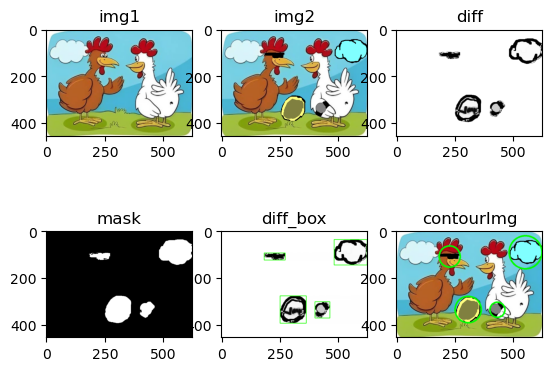

In [193]:
from skimage.metrics import structural_similarity as SIMM
import matplotlib.pyplot as plt
import cv2
import numpy as np



def printDifferences(img1,img2):
    # get image copy for display purpose
    og1 = img1.copy()
    og2 = img2.copy()
    # convert to grayscale: 
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute SSIM between the 2 images
    (score, diff) = SIMM(img1_gray, img2_gray, full=True)
    diff = (diff * 255).astype("uint8") # diff is True-False rn, cvrt it to int (range 0-255)
    diff_box = cv2.merge([diff, diff, diff]) # allow it to have 3 channel for coloring purpose

    # Get Contours
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("cant find contours")
        quit()


    mask = np.zeros(img1.shape, dtype='uint8')
    contourImg = img2.copy()

    # Get datas from contours

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 20:
            x,y,w,h = cv2.boundingRect(contour)
            cv2.rectangle(img1, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.rectangle(img2, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.drawContours(mask, [contour], 0, (255,255,255), -1) # -1 fills contour's inside

            cx = x+int(w/2)
            cy = y+ int(h/2)
            center_coordinates = (cx,cy)
            radius = int(w/2)
            cv2.circle(contourImg, center_coordinates, radius, (0,255,0), 5) 

    # Display
    ## convert to RGB for viewing 
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    og1 = cv2.cvtColor(og1, cv2.COLOR_BGR2RGB)
    og2 = cv2.cvtColor(og2, cv2.COLOR_BGR2RGB)
    contourImg = cv2.cvtColor(contourImg, cv2.COLOR_BGR2RGB)

    ## show plot
    fig = plt.figure()

    ax0 = fig.add_subplot(2,3,1)
    ax0.imshow(og1)
    ax0.title.set_text('img1')

    ax1 = fig.add_subplot(2,3,2)
    ax1.imshow(og2)
    ax1.title.set_text('img2')

    ax2 = fig.add_subplot(2,3,3)
    ax2.imshow(diff,cmap="gray")
    ax2.title.set_text('diff')

    ax3 = fig.add_subplot(2,3,4)
    ax3.imshow(mask,cmap='gray')
    ax3.title.set_text('mask')


    ax4 = fig.add_subplot(2,3,5)
    ax4.imshow(diff_box,cmap="gray")
    ax4.title.set_text('diff_box')

    ax5 = fig.add_subplot(2,3,6)
    ax5.imshow(contourImg)
    ax5.title.set_text('contourImg')

# Load images
imgs_path = './resources/chick1.png'
img1 = cv2.imread(imgs_path)
imgs_path = './resources/chick3.png'
img2 = cv2.imread(imgs_path)

# Check out the differences!
printDifferences(img1,img2)

In [7]:



def getDifferencesData(img1,img2,levelName):
    # get image copy for display purpose
    og1 = img1.copy()
    og2 = img2.copy()
    # convert to grayscale: 
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute SSIM between the 2 images
    (score, diff) = SIMM(img1_gray, img2_gray, full=True)
    diff = (diff * 255).astype("uint8") # diff is True-False rn, cvrt it to int (range 0-255)
    diff_box = cv2.merge([diff, diff, diff]) # allow it to have 3 channel for coloring purpose

    # Get Contours
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("cant find contours")
        quit()


    mask = np.zeros(img1.shape, dtype='uint8')
    contourImg = img2.copy()

    # Get datas from contours
    contoursData = {
        "levelName": levelName,
        "differences": []
        }
    ## Generate Datas
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 40:
            x,y,w,h = cv2.boundingRect(contour)
            cx = x+int(w/2)
            cy = y+ int(h/2)
            # center_coordinates = (cx,cy)
            center_coordinates = [{'x': cx,'y':cy}]
            radius = int(w/2)

            data = {
                "coor": center_coordinates,
                "radius": radius
            }
            contoursData['differences'].append(data)
    
    # Serializing json
    json_object = json.dumps(contoursData, indent=4)
    
    # Writing to sample.json
    with open("./output/coor.json", "w") as outfile:
        outfile.write(json_object)

    with open("./output/coor.json") as readFile:
        datas = json.load(readFile)
        for data in datas:
            print(data)

# Load images
imgs_path = './resources/chick1.png'
img1 = cv2.imread(imgs_path)
imgs_path = './resources/chick3.png'
img2 = cv2.imread(imgs_path)


# Check out the differences!
getDifferencesData(img1,img2,"2Chickens")

levelName
differences


# Image Generating (add new image into the picture)
- the first trial's result looks fine at first but there're too much noise
- Therefore, I tried creating another mask

1


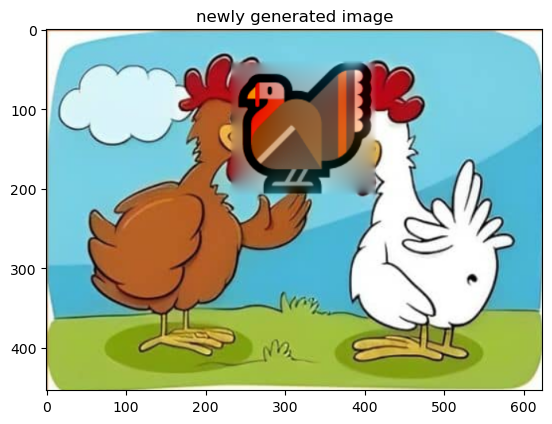

In [144]:
import random

# get og image
image1 = cv2.imread('./resources/chick1.png')
width, height = (image1.shape[0],image1.shape[1])

# get Turkey !
smol_turkey = cv2.imread('./resources/turkey.png')
## get turkey out of background
smol_turkey_gray = cv2.cvtColor(smol_turkey, cv2.COLOR_BGR2GRAY)
bin_threshold = 10

binMask = smol_turkey_gray < bin_threshold #forming the binary image

binary_img = binMask
binary_img.dtype='uint8' # convert binary_img in type of true false to decimal 0-1 array
binary_img = np.array(binary_img*255,dtype=np.uint8) # convert binary_img in type of true false to decimal 0-255 array


contours,hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) == 0:
    print("cant find contours")
    quit()
else:
    print(len(contours))

# Get new mask from contours
cv2.drawContours(binMask, [contours[0]], 0, (255,255,255), -1) # -1 fills contour's inside
binMask*=255
binMask = np.zeros(smol_turkey.shape,smol_turkey.dtype)+255
number_of_turkeys = 1
x = int(random.randint(40, width-40))
y = int(random.randint(40, height-40))
image1 = cv2.seamlessClone(smol_turkey, image1, binMask, [x,y], cv2.NORMAL_CLONE)
#Display
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(image1)
ax.title.set_text('newly generated image')

1


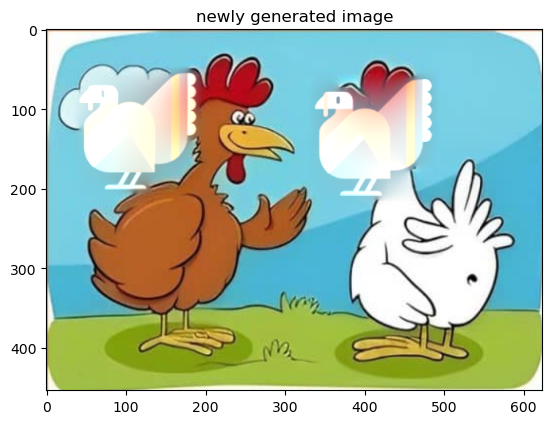

In [277]:
import random

# get og image
image1 = cv2.imread('./resources/chick1.png')
width, height = (image1.shape[0],image1.shape[1])

# get Turkey !
smol_turkey = cv2.imread('./resources/turkey.png')
## get turkey out of background
smol_turkey_gray = cv2.cvtColor(smol_turkey, cv2.COLOR_BGR2GRAY)
bin_threshold = 10

binMask = smol_turkey_gray < bin_threshold #forming the binary image

binMask.dtype='uint8' # convert binary_img in type of true false to decimal 0-1 array
binMask = np.array(binMask*255,dtype=np.uint8) # convert binary_img in type of true false to decimal 0-255 array


contours,hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) == 0:
    print("cant find contours")
    quit()
else:
    print(len(contours))

# Get new mask from contours
cv2.drawContours(binMask, [contours[0]], 0, (255,255,255), -1) # -1 fills contour's inside

#add  2 turkeys randomly !! because, why not ? :v
# smol_turkey = cv2.resize(smol_turkey, (10,10))
number_of_turkeys = 2
for i in range(number_of_turkeys):
    x = int(random.randint(40, width-40))
    y = int(random.randint(40, height-50))
    image1 = cv2.seamlessClone(smol_turkey, image1, binMask, [x,y], cv2.NORMAL_CLONE)

#Display
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(image1)
# ax.imshow(binMask)
ax.title.set_text('newly generated image')

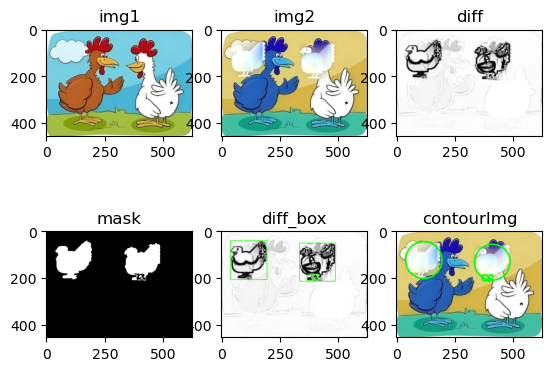

In [278]:
newImage = image1.copy()
img1 = cv2.imread('./resources/chick1.png')
printDifferences(img1,newImage)